# STEP 1: Import Libraries and Load Data

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor, ExtraTreesRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor
import warnings
warnings.filterwarnings("ignore")

# Load the dataset

In [2]:
data = pd.read_csv('electric_vehicles_spec_2025.csv.csv')
data.head()

,brand,model,top_speed_kmh,battery_capacity_kWh,battery_type,number_of_cells,torque_nm,efficiency_wh_per_km,range_km,acceleration_0_100_s,fast_charging_power_kw_dc,fast_charge_port,towing_capacity_kg,cargo_volume_l,seats,drivetrain,segment,length_mm,width_mm,height_mm,car_body_type,source_url
0,Abarth,500e Convertible,155,37.8,Lithium-ion,192.0,235.0,156,225,7.0,67.0,CCS,0.0,185,4,FWD,B - Compact,3673,1683,1518,Hatchback,https://ev-database.org/car/1904/Abarth-500e-C...
1,Abarth,500e Hatchback,155,37.8,Lithium-ion,192.0,235.0,149,225,7.0,67.0,CCS,0.0,185,4,FWD,B - Compact,3673,1683,1518,Hatchback,https://ev-database.org/car/1903/Abarth-500e-H...
2,Abarth,600e Scorpionissima,200,50.8,Lithium-ion,102.0,345.0,158,280,5.9,79.0,CCS,0.0,360,5,FWD,JB - Compact,4187,1779,1557,SUV,https://ev-database.org/car/3057/Abarth-600e-S...
3,Abarth,600e Turismo,200,50.8,Lithium-ion,102.0,345.0,158,280,6.2,79.0,CCS,0.0,360,5,FWD,JB - Compact,4187,1779,1557,SUV,https://ev-database.org/car/3056/Abarth-600e-T...
4,Aiways,U5,150,60.0,Lithium-ion,NaN,310.0,156,315,7.5,78.0,CCS,NaN,496,5,FWD,JC - Medium,4680,1865,1700,SUV,https://ev-database.org/car/1678/Aiways-U5


#  Basic structure

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 478 entries, 0 to 477
Data columns (total 22 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   brand                      478 non-null    object 
 1   model                      477 non-null    object 
 2   top_speed_kmh              478 non-null    int64  
 3   battery_capacity_kWh       478 non-null    float64
 4   battery_type               478 non-null    object 
 5   number_of_cells            276 non-null    float64
 6   torque_nm                  471 non-null    float64
 7   efficiency_wh_per_km       478 non-null    int64  
 8   range_km                   478 non-null    int64  
 9   acceleration_0_100_s       478 non-null    float64
 10  fast_charging_power_kw_dc  477 non-null    float64
 11  fast_charge_port           477 non-null    object 
 12  towing_capacity_kg         452 non-null    float64
 13  cargo_volume_l             477 non-null    object 

In [4]:
data.isna().sum()

brand                          0
model                          1
top_speed_kmh                  0
battery_capacity_kWh           0
battery_type                   0
number_of_cells              202
torque_nm                      7
efficiency_wh_per_km           0
range_km                       0
acceleration_0_100_s           0
fast_charging_power_kw_dc      1
fast_charge_port               1
towing_capacity_kg            26
cargo_volume_l                 1
seats                          0
drivetrain                     0
segment                        0
length_mm                      0
width_mm                       0
height_mm                      0
car_body_type                  0
source_url                     0
dtype: int64

# STEP 2: Exploratory Data Analysis

In [5]:
data.drop('number_of_cells',axis=1,inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 478 entries, 0 to 477
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   brand                      478 non-null    object 
 1   model                      477 non-null    object 
 2   top_speed_kmh              478 non-null    int64  
 3   battery_capacity_kWh       478 non-null    float64
 4   battery_type               478 non-null    object 
 5   torque_nm                  471 non-null    float64
 6   efficiency_wh_per_km       478 non-null    int64  
 7   range_km                   478 non-null    int64  
 8   acceleration_0_100_s       478 non-null    float64
 9   fast_charging_power_kw_dc  477 non-null    float64
 10  fast_charge_port           477 non-null    object 
 11  towing_capacity_kg         452 non-null    float64
 12  cargo_volume_l             477 non-null    object 
 13  seats                      478 non-null    int64  

In [6]:
num = data.select_dtypes(include = ['int64','float64']).columns
cat = data.select_dtypes(include = 'object').columns

In [7]:
si = SimpleImputer(strategy='median')
data[num] = si.fit_transform(data[num])

In [8]:
si = SimpleImputer(strategy='most_frequent')
data[cat] = si.fit_transform(data[cat])

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 478 entries, 0 to 477
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   brand                      478 non-null    object 
 1   model                      478 non-null    object 
 2   top_speed_kmh              478 non-null    float64
 3   battery_capacity_kWh       478 non-null    float64
 4   battery_type               478 non-null    object 
 5   torque_nm                  478 non-null    float64
 6   efficiency_wh_per_km       478 non-null    float64
 7   range_km                   478 non-null    float64
 8   acceleration_0_100_s       478 non-null    float64
 9   fast_charging_power_kw_dc  478 non-null    float64
 10  fast_charge_port           478 non-null    object 
 11  towing_capacity_kg         478 non-null    float64
 12  cargo_volume_l             478 non-null    object 
 13  seats                      478 non-null    float64

In [10]:
data.nunique()

brand                         59
model                        477
top_speed_kmh                 38
battery_capacity_kWh         121
battery_type                   1
torque_nm                    128
efficiency_wh_per_km         112
range_km                      88
acceleration_0_100_s          97
fast_charging_power_kw_dc     71
fast_charge_port               2
towing_capacity_kg            26
cargo_volume_l               140
seats                          7
drivetrain                     3
segment                       15
length_mm                    172
width_mm                     108
height_mm                    162
car_body_type                  8
source_url                   478
dtype: int64

In [11]:
data.describe()

,top_speed_kmh,battery_capacity_kWh,torque_nm,efficiency_wh_per_km,range_km,acceleration_0_100_s,fast_charging_power_kw_dc,towing_capacity_kg,seats,length_mm,width_mm,height_mm
count,478.000000,478.000000,478.000000,478.000000,478.000000,478.000000,478.000000,478.000000,478.000000,478.000000,478.000000,478.000000
mean,185.487448,74.043724,497.016736,162.903766,393.179916,6.882636,124.983264,1049.418410,5.263598,4678.506276,1887.359833,1601.125523
std,34.252773,20.331058,239.822348,34.317532,103.287335,2.730696,58.146563,717.558948,1.003961,369.210573,73.656807,130.754851
min,125.000000,21.300000,113.000000,109.000000,135.000000,2.200000,29.000000,0.000000,2.000000,3620.000000,1610.000000,1329.000000
25%,160.000000,60.000000,310.000000,143.000000,320.000000,4.800000,80.000000,500.000000,5.000000,4440.000000,1849.000000,1514.000000
50%,180.000000,76.150000,430.000000,155.000000,397.500000,6.600000,113.000000,1000.000000,5.000000,4720.000000,1890.000000,1596.000000
75%,201.000000,90.600000,679.000000,177.750000,470.000000,8.200000,150.000000,1600.000000,5.000000,4961.000000,1939.000000,1665.000000
max,325.000000,118.000000,1350.000000,370.000000,685.000000,19.100000,281.000000,2500.000000,9.000000,5908.000000,2080.000000,1986.000000


# STEP 3: Data Cleaning and Type Fixes

In [12]:
data['cargo_volume_l'] = data['cargo_volume_l'].str.extract('(\d+)')
data['cargo_volume_l'] = pd.to_numeric(data['cargo_volume_l'], errors='coerce')

# STEP 4: Visualizing Distributions of Numerical Features

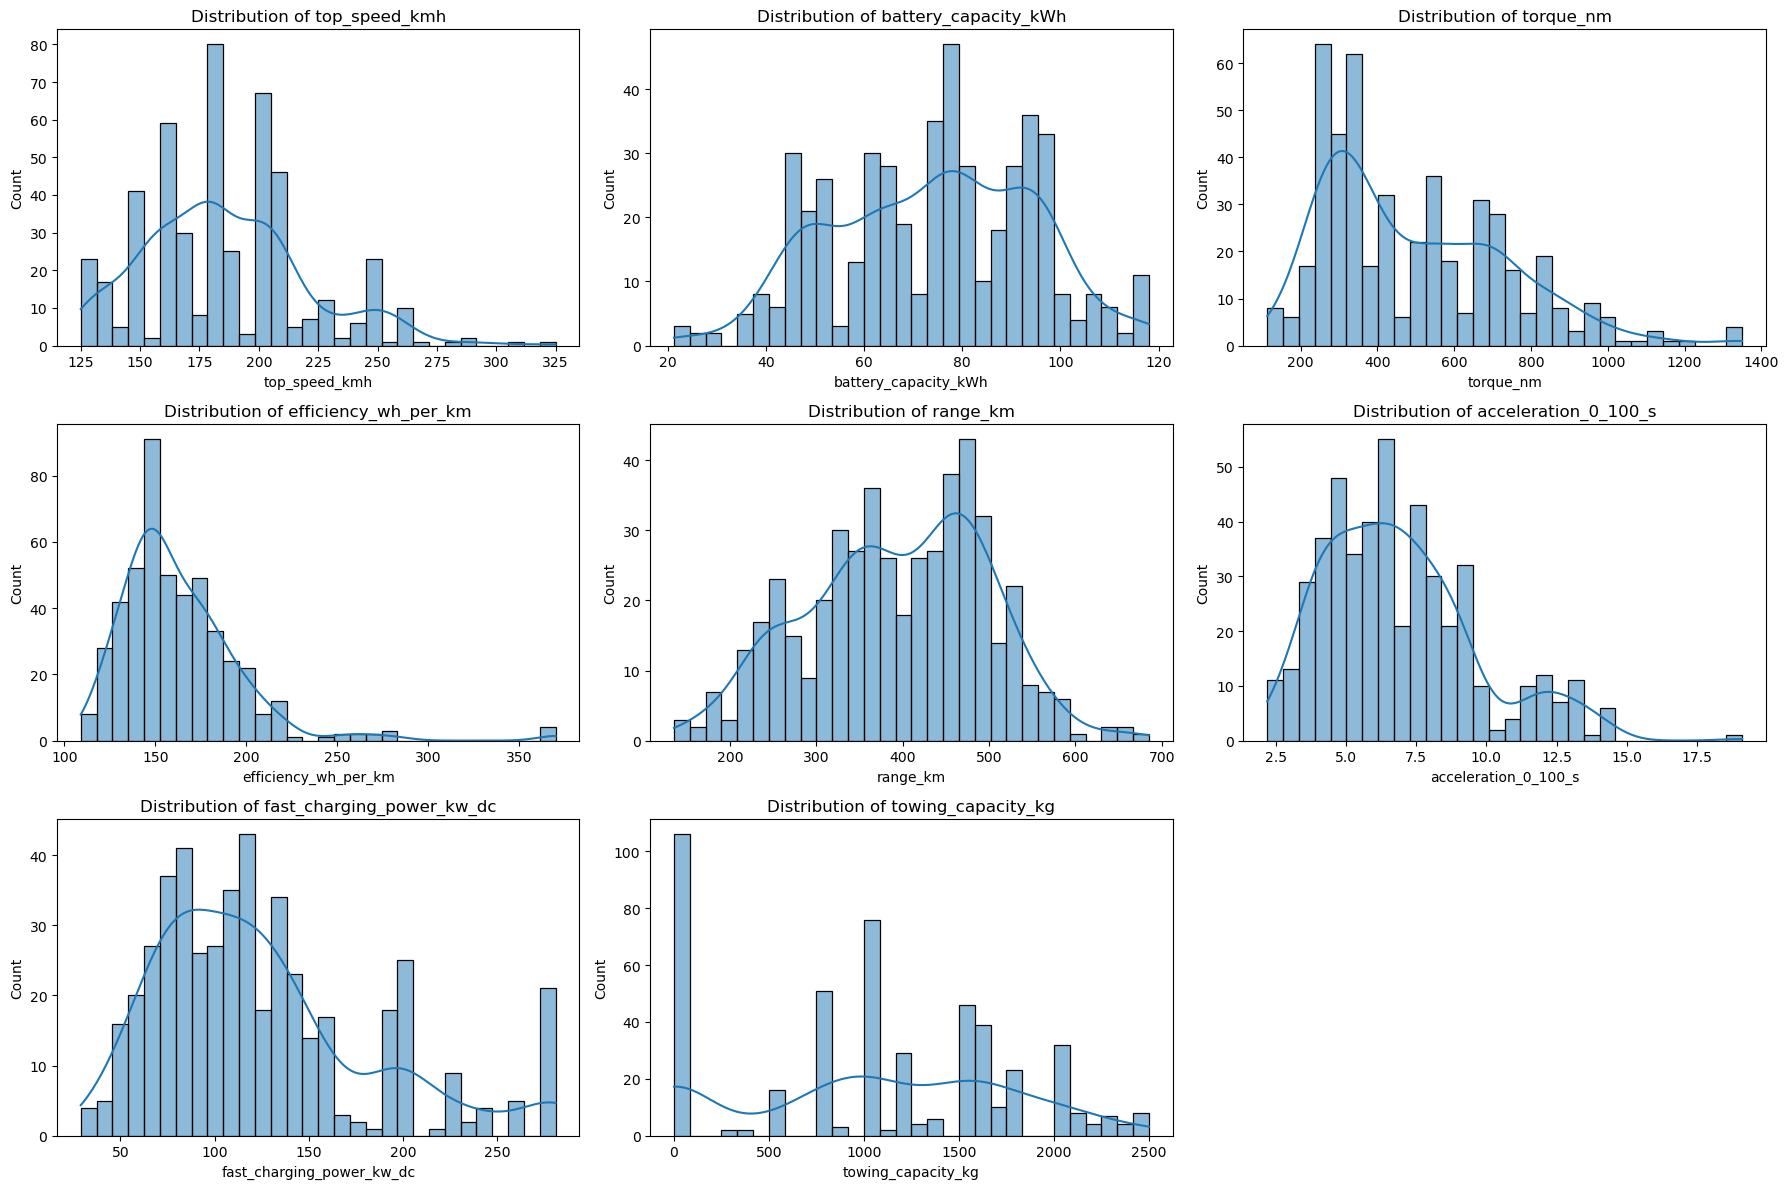

In [13]:
num_cols = ['top_speed_kmh', 'battery_capacity_kWh', 'torque_nm', 'efficiency_wh_per_km',
            'range_km', 'acceleration_0_100_s', 'fast_charging_power_kw_dc', 'towing_capacity_kg']

plt.figure(figsize=(18, 12))
for i, col in enumerate(num_cols):
    plt.subplot(3, 3, i + 1)
    sns.histplot(data[col].dropna(), kde=True, bins=30)
    plt.title(f"Distribution of {col}")
plt.tight_layout()
plt.show()

# STEP 5: Categorical Distributions

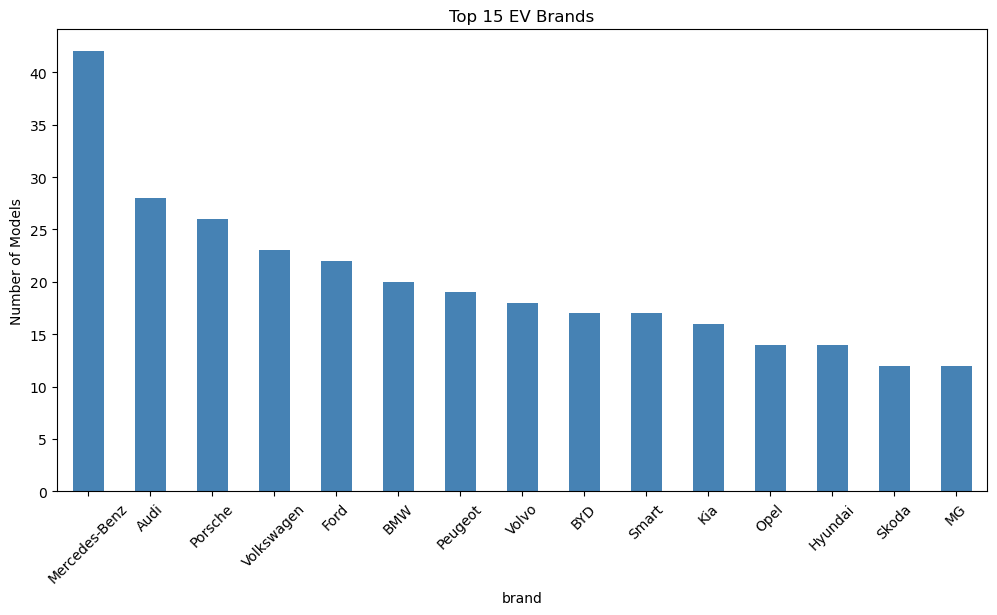

In [14]:
plt.figure(figsize=(12, 6))
data['brand'].value_counts().head(15).plot(kind='bar', color='steelblue')
plt.title("Top 15 EV Brands")
plt.ylabel("Number of Models")
plt.xticks(rotation=45)
plt.show()

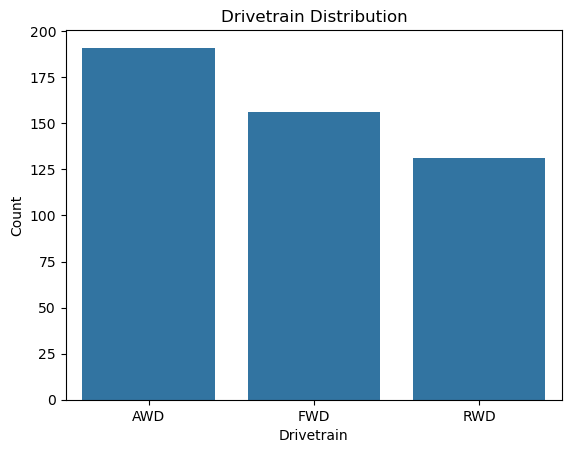

In [15]:
sns.countplot(data=data, x='drivetrain', order=data['drivetrain'].value_counts().index)
plt.title("Drivetrain Distribution")
plt.xlabel("Drivetrain")
plt.ylabel("Count")
plt.show()

# STEP 6: Correlation Analysis

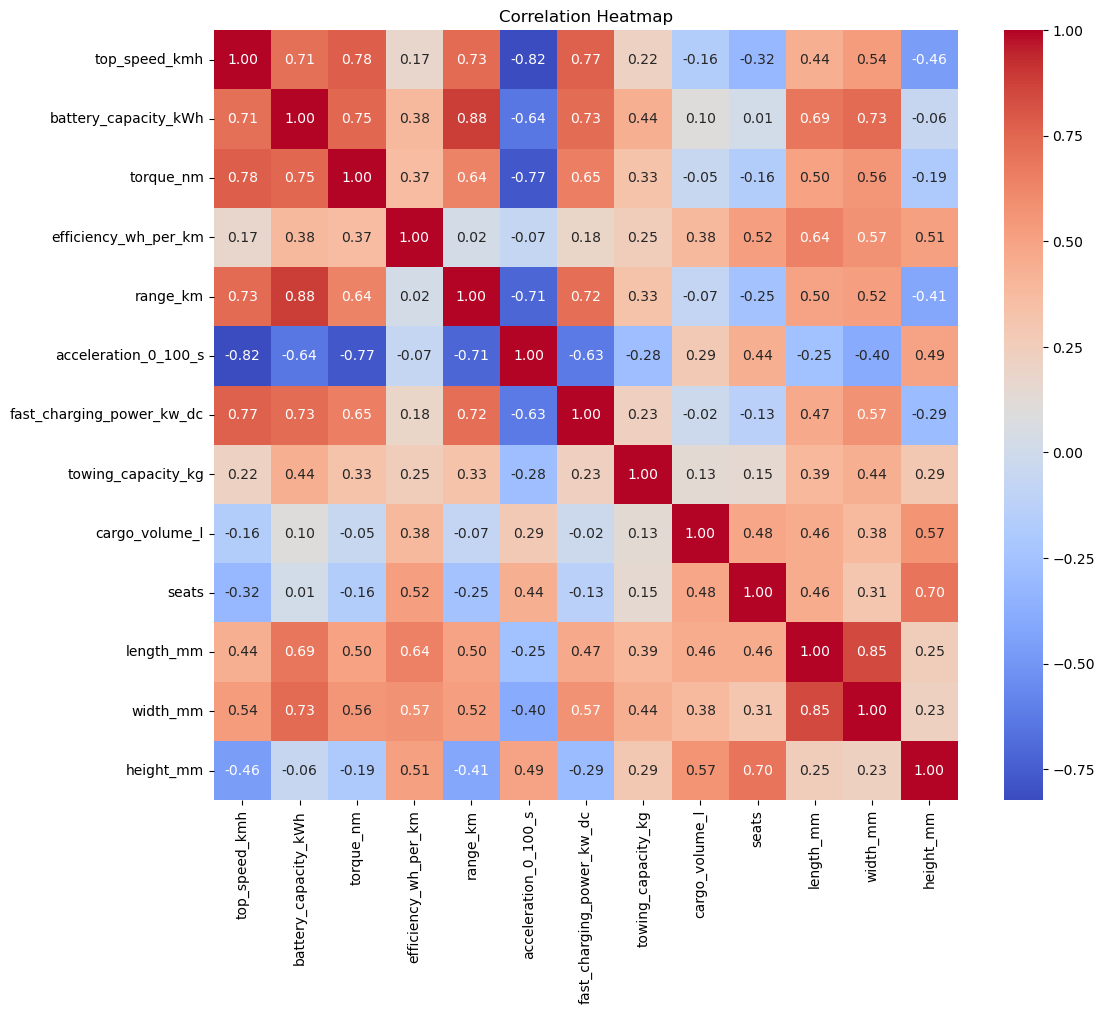

In [16]:
plt.figure(figsize=(12, 10))
sns.heatmap(data.corr(numeric_only=True), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

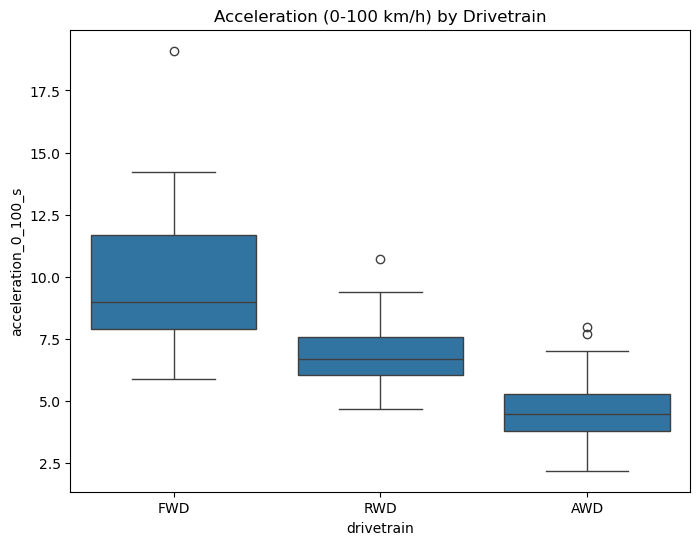

In [17]:
plt.figure(figsize=(8,6))
sns.boxplot(data=data, x='drivetrain', y='acceleration_0_100_s')
plt.title("Acceleration (0-100 km/h) by Drivetrain")
plt.show()

In [18]:
data.head()

,brand,model,top_speed_kmh,battery_capacity_kWh,battery_type,torque_nm,efficiency_wh_per_km,range_km,acceleration_0_100_s,fast_charging_power_kw_dc,fast_charge_port,towing_capacity_kg,cargo_volume_l,seats,drivetrain,segment,length_mm,width_mm,height_mm,car_body_type,source_url
0,Abarth,500e Convertible,155.0,37.8,Lithium-ion,235.0,156.0,225.0,7.0,67.0,CCS,0.0,185,4.0,FWD,B - Compact,3673.0,1683.0,1518.0,Hatchback,https://ev-database.org/car/1904/Abarth-500e-C...
1,Abarth,500e Hatchback,155.0,37.8,Lithium-ion,235.0,149.0,225.0,7.0,67.0,CCS,0.0,185,4.0,FWD,B - Compact,3673.0,1683.0,1518.0,Hatchback,https://ev-database.org/car/1903/Abarth-500e-H...
2,Abarth,600e Scorpionissima,200.0,50.8,Lithium-ion,345.0,158.0,280.0,5.9,79.0,CCS,0.0,360,5.0,FWD,JB - Compact,4187.0,1779.0,1557.0,SUV,https://ev-database.org/car/3057/Abarth-600e-S...
3,Abarth,600e Turismo,200.0,50.8,Lithium-ion,345.0,158.0,280.0,6.2,79.0,CCS,0.0,360,5.0,FWD,JB - Compact,4187.0,1779.0,1557.0,SUV,https://ev-database.org/car/3056/Abarth-600e-T...
4,Aiways,U5,150.0,60.0,Lithium-ion,310.0,156.0,315.0,7.5,78.0,CCS,1000.0,496,5.0,FWD,JC - Medium,4680.0,1865.0,1700.0,SUV,https://ev-database.org/car/1678/Aiways-U5


In [19]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for i in cat:
    data[i] = le.fit_transform(data[i])

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 478 entries, 0 to 477
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   brand                      478 non-null    int32  
 1   model                      478 non-null    int32  
 2   top_speed_kmh              478 non-null    float64
 3   battery_capacity_kWh       478 non-null    float64
 4   battery_type               478 non-null    int32  
 5   torque_nm                  478 non-null    float64
 6   efficiency_wh_per_km       478 non-null    float64
 7   range_km                   478 non-null    float64
 8   acceleration_0_100_s       478 non-null    float64
 9   fast_charging_power_kw_dc  478 non-null    float64
 10  fast_charge_port           478 non-null    int32  
 11  towing_capacity_kg         478 non-null    float64
 12  cargo_volume_l             478 non-null    int64  
 13  seats                      478 non-null    float64

In [20]:
pd.options.display.max_columns=22

In [21]:
data.head()

,brand,model,top_speed_kmh,battery_capacity_kWh,battery_type,torque_nm,efficiency_wh_per_km,range_km,acceleration_0_100_s,fast_charging_power_kw_dc,fast_charge_port,towing_capacity_kg,cargo_volume_l,seats,drivetrain,segment,length_mm,width_mm,height_mm,car_body_type,source_url
0,0,46,155.0,37.8,0,235.0,156.0,225.0,7.0,67.0,0,0.0,4,4.0,1,1,3673.0,1683.0,1518.0,2,87
1,0,47,155.0,37.8,0,235.0,149.0,225.0,7.0,67.0,0,0.0,4,4.0,1,1,3673.0,1683.0,1518.0,2,86
2,0,51,200.0,50.8,0,345.0,158.0,280.0,5.9,79.0,0,0.0,32,5.0,1,9,4187.0,1779.0,1557.0,4,366
3,0,52,200.0,50.8,0,345.0,158.0,280.0,6.2,79.0,0,0.0,32,5.0,1,9,4187.0,1779.0,1557.0,4,365
4,1,396,150.0,60.0,0,310.0,156.0,315.0,7.5,78.0,0,1000.0,80,5.0,1,10,4680.0,1865.0,1700.0,4,27


In [22]:
data.drop(['source_url'],axis=1,inplace=True)
data.head()

,brand,model,top_speed_kmh,battery_capacity_kWh,battery_type,torque_nm,efficiency_wh_per_km,range_km,acceleration_0_100_s,fast_charging_power_kw_dc,fast_charge_port,towing_capacity_kg,cargo_volume_l,seats,drivetrain,segment,length_mm,width_mm,height_mm,car_body_type
0,0,46,155.0,37.8,0,235.0,156.0,225.0,7.0,67.0,0,0.0,4,4.0,1,1,3673.0,1683.0,1518.0,2
1,0,47,155.0,37.8,0,235.0,149.0,225.0,7.0,67.0,0,0.0,4,4.0,1,1,3673.0,1683.0,1518.0,2
2,0,51,200.0,50.8,0,345.0,158.0,280.0,5.9,79.0,0,0.0,32,5.0,1,9,4187.0,1779.0,1557.0,4
3,0,52,200.0,50.8,0,345.0,158.0,280.0,6.2,79.0,0,0.0,32,5.0,1,9,4187.0,1779.0,1557.0,4
4,1,396,150.0,60.0,0,310.0,156.0,315.0,7.5,78.0,0,1000.0,80,5.0,1,10,4680.0,1865.0,1700.0,4


In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 478 entries, 0 to 477
Data columns (total 20 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   brand                      478 non-null    int32  
 1   model                      478 non-null    int32  
 2   top_speed_kmh              478 non-null    float64
 3   battery_capacity_kWh       478 non-null    float64
 4   battery_type               478 non-null    int32  
 5   torque_nm                  478 non-null    float64
 6   efficiency_wh_per_km       478 non-null    float64
 7   range_km                   478 non-null    float64
 8   acceleration_0_100_s       478 non-null    float64
 9   fast_charging_power_kw_dc  478 non-null    float64
 10  fast_charge_port           478 non-null    int32  
 11  towing_capacity_kg         478 non-null    float64
 12  cargo_volume_l             478 non-null    int64  
 13  seats                      478 non-null    float64

# Define features and target

In [24]:
X = data.drop('range_km', axis=1)
y = data['range_km']

# Train-test split

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=537)

# Define models

In [26]:
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(),
    "Lasso Regression": Lasso(),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=537),
    "Gradient Boosting": GradientBoostingRegressor(n_estimators=100, random_state=537),
    "AdaBoost": AdaBoostRegressor(n_estimators=100, random_state=537),
    "Extra Trees": ExtraTreesRegressor(n_estimators=100, random_state=537),
    "Support Vector Regressor": SVR(),
    "K-Nearest Neighbors": KNeighborsRegressor(n_neighbors=5),
    "XGBoost": XGBRegressor(n_estimators=100, random_state=537)
}

# Preprocessing pipeline

In [27]:
from sklearn.pipeline import Pipeline
preprocessor = Pipeline([
    ('imputer',SimpleImputer(strategy='mean')),
    ('scaler',StandardScaler())
])

# Evaluate models

In [28]:
results = []

for name, model in models.items():
    pipeline = make_pipeline(preprocessor, model)
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    results.append({
        "Model": name,
        "RMSE": rmse,
        'MAE': mae,
        "R2 Score": r2
    })

# Show results

In [29]:
results_df = pd.DataFrame(results).sort_values(by="R2 Score", ascending=False)
results_df

,Model,RMSE,MAE,R2 Score
9,XGBoost,19.421461,14.070138,0.958465
4,Gradient Boosting,19.882130,14.913168,0.956471
3,Random Forest,20.129794,15.104167,0.955380
0,Linear Regression,20.211301,15.862246,0.955018
1,Ridge Regression,20.345097,15.996395,0.954420
6,Extra Trees,22.032080,15.101042,0.946548
2,Lasso Regression,23.469332,17.769824,0.939347
5,AdaBoost,32.247960,26.427691,0.885486
8,K-Nearest Neighbors,43.434337,31.520833,0.792260
7,Support Vector Regressor,79.137311,62.267057,0.310369


# Best model visualization

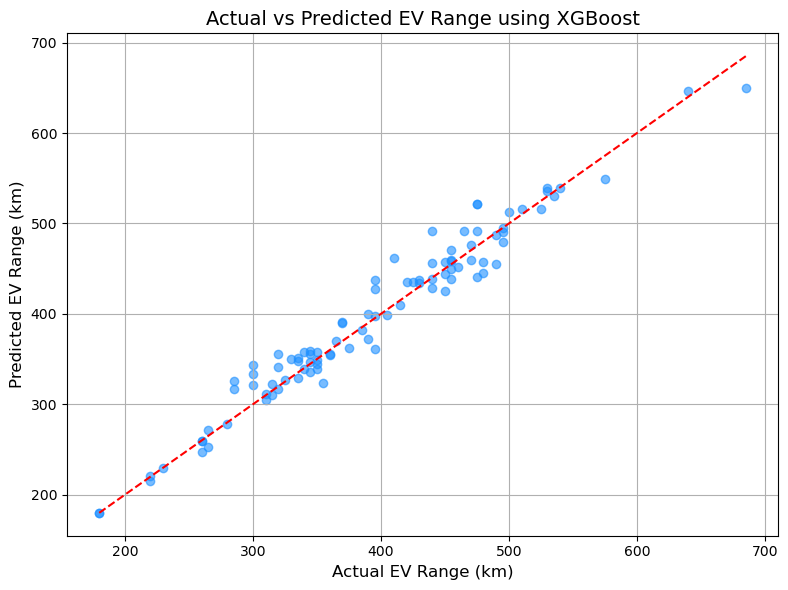

In [30]:
# Use best model: XGBoost
best_model = make_pipeline(preprocessor, XGBRegressor(n_estimators=100, random_state=537))
best_model.fit(X_train, y_train)

# Predictions
y_pred_best = best_model.predict(X_test)

# Plot: Actual vs Predicted
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_best, alpha=0.6, color='dodgerblue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual EV Range (km)", fontsize=12)
plt.ylabel("Predicted EV Range (km)", fontsize=12)
plt.title("Actual vs Predicted EV Range using XGBoost", fontsize=14)
plt.grid(True)
plt.tight_layout()
plt.show()

In [31]:
import joblib
feature_columns = X.columns.to_list()
joblib.dump(best_model,'Electric_Vehicles_Spec_2025.joblib')

['Electric_Vehicles_Spec_2025.joblib']

In [32]:
joblib.dump(feature_columns,'features_Electric_Vehicles_Spec_2025.joblib')

['features_Electric_Vehicles_Spec_2025.joblib']

In [ ]:
import streamlit as st
import pandas as pd
import joblib

model = joblib.load('Electric_Vehicles_Spec_2025.joblib')
features = joblib.load('features_Electric_Vehicles_Spec_2025.joblib')
st.title('Electric_Vehicles_Spec_2025')

user_input={}
for i in features:
    user_input[i] = st.number_input(i,value=0.0)

if st.button('Predict'):
    data = pd.DataFrame([user_input])
    pred = model.predict(data)[0]
    st.success(f'Prediction : {(Pred)}')